# game sales analysis

Data set from: [link](https://www.kaggle.com/advaitvagerwal/video-game-sales-beginner)

importing pandas, numpy and matplotlib

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

load the data and store it in the variable games:

In [2]:
games = pd.read_csv("vgsales.csv")

Fast look at the some values from data set 

In [8]:
games.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


And look at the data types

In [9]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


We can see that there's more numeric values mostly float and one int for rank column

Finding the total null values in each column:

In [10]:
print(games.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


We can see that the most amount of null values is in the year column - 271 and 58 in publisher column, for make he analysis with respect to year we need to fill the null cales:

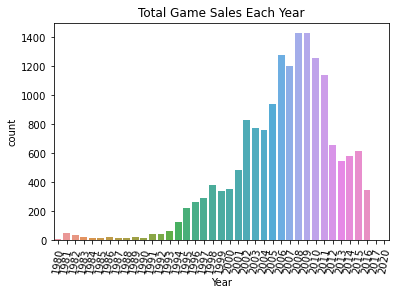

In [25]:
mean = games["Year"].mean()
games["Year"].fillna(mean, inplace=True)
#  making a plot:
plt.xticks(rotation=80)
x_axis = games["Year"].astype(int)
sns.countplot(x=x_axis, data = games)
plt.title("Total Game Sales Each Year")
plt.show()

We can see that the the biggest amount of games was sold in 2009 and 2009

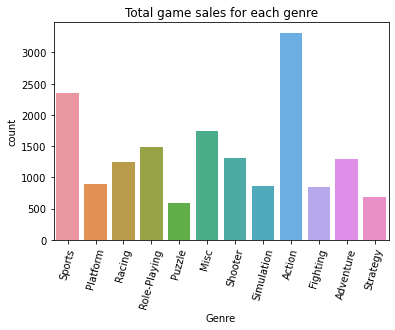

In [29]:
plt.xticks(rotation = 75)
x_axis = games["Genre"]
sns.countplot(x = x_axis, data = games)
plt.title("Total game sales for each genre")
plt.show()

Action is the most popular game

The most sold games in each genre:

In [47]:
game_sales = games[["Genre", "Name"]].groupby(["Genre"]).agg(lambda x: x.value_counts().index[0])
genre_games = game_sales.rename(columns = {"Name" : "Game"}, inplace = False)
genre_games

,Game
Genre,
Action,Ratatouille
Adventure,The Walking Dead: Season One
Fighting,WWE All Stars
Misc,Monopoly
Platform,Wall-E
Puzzle,Bomberman
Racing,Need for Speed: Most Wanted
Role-Playing,Marvel: Ultimate Alliance
Shooter,Call of Duty: Ghosts


Video game sales on each platform

<AxesSubplot:xlabel='Platform', ylabel='count'>

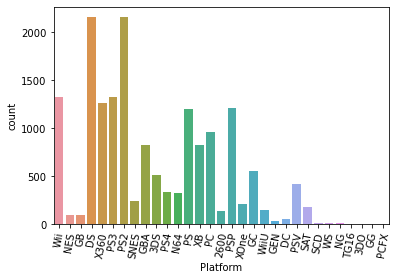

In [50]:
plt.xticks(rotation = 80)
x_axis = games["Platform"]
sns.countplot(x=x_axis, data= games)

Thus PS2 and DS are the most used platforms

To find the correlation between values in dataset:

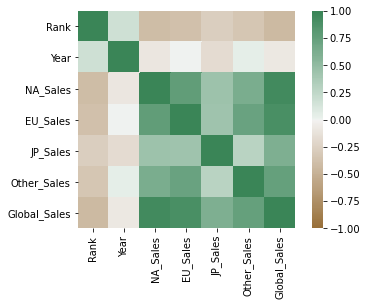

In [57]:
correlation_games = games.corr()
axis_corr = sns.heatmap(correlation_games,
                       vmin=-1, vmax=1,center=0,
                       cmap = sns.diverging_palette(50,500,n=500),
                        square=True)
plt.show()

The NA sales and EU sales are closely related to Global sales

For analysis the most common publisher we need to fill the null values

In [72]:
games["Publisher"] = games["Publisher"].fillna("Unknown")
number_df = games.groupby("Publisher")[["Name"]].count().sort_values("Name", ascending = False).head(50)
number_df
number_clean = number_df.rename(columns={"Name" : "Number"}, inplace=False)
number_clean

,Number
Publisher,
Electronic Arts,1351
Activision,975
Namco Bandai Games,932
Ubisoft,921
Konami Digital Entertainment,832
THQ,715
Nintendo,703
Sony Computer Entertainment,683
Sega,639


Text(0.5, 1.0, 'Top Publishers of games')

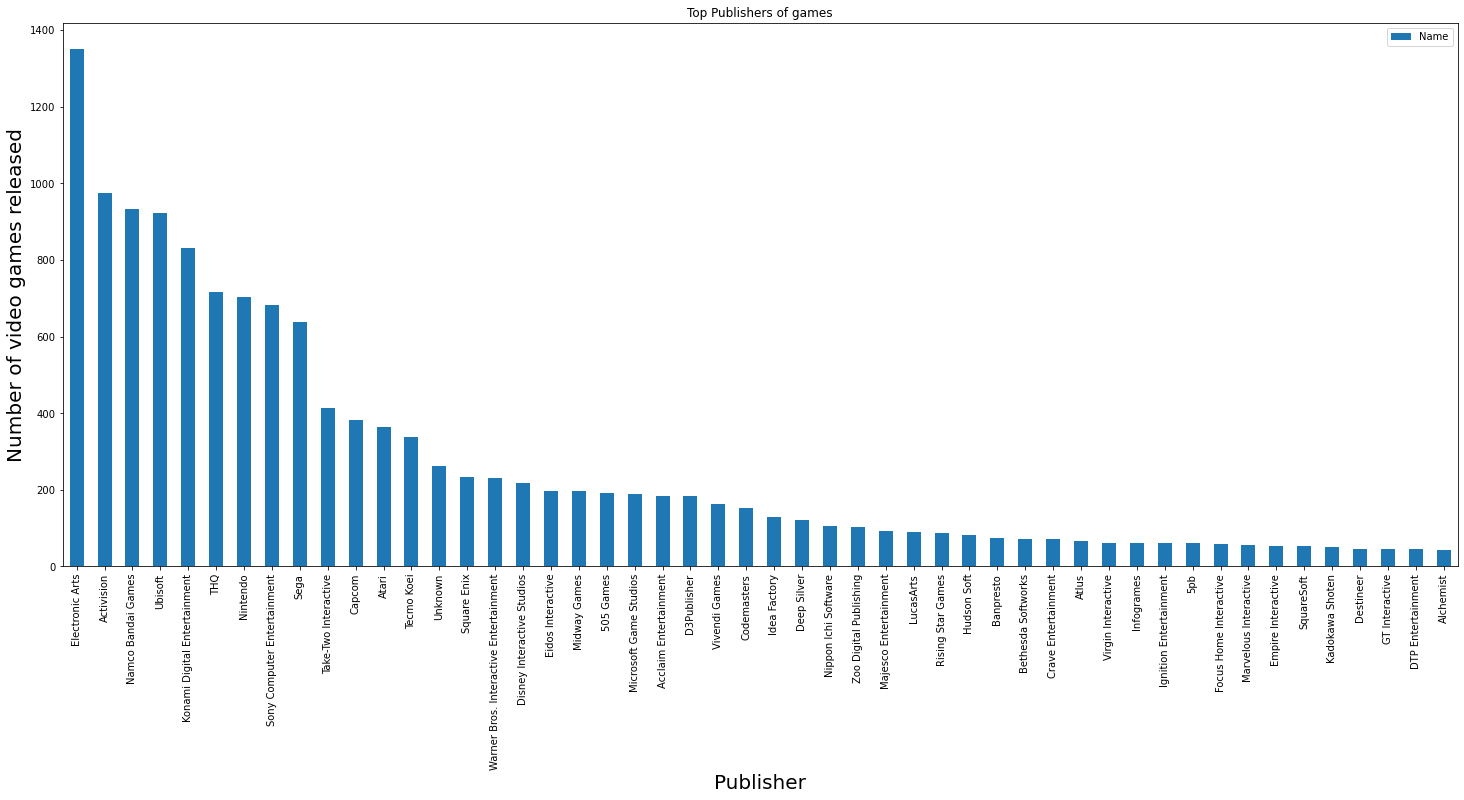

In [73]:
number_df.plot(kind = "bar", figsize= (25,10))
plt.xlabel("Publisher", fontsize=20)
plt.ylabel("Number of video games released", fontsize = 20)
plt.title("Top Publishers of games")

Most common game publisher is Electronic arst followed by Activision

For most common games by region,

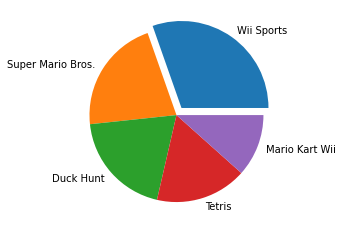

In [82]:
top_games_na = games.sort_values("NA_Sales", ascending=False).head(5)
explode = [0.1, 0, 0, 0, 0]
plt.pie(top_games_na["NA_Sales"], labels=top_games_na["Name"],explode=explode)
plt.show()

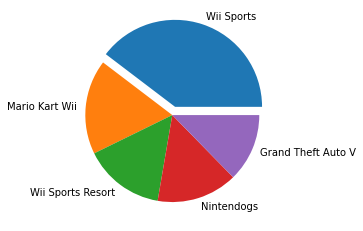

In [90]:
top_games_eu = games.sort_values("EU_Sales", ascending=False).head(5)
explode = [0.1, 0, 0, 0 , 0]
plt.pie(top_games_eu["EU_Sales"], labels=top_games_eu["Name"], explode=explode)
plt.show()

game sales in Japan

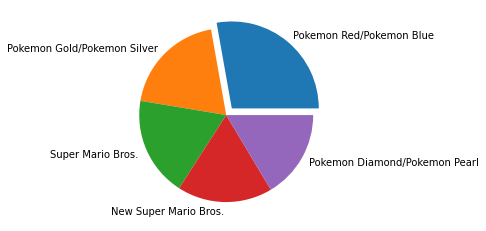

In [103]:
top_games_jp = games.sort_values('JP_Sales', ascending=False).head(5)
explode = [0.1, 0 , 0 , 0, 0]
plt.pie(top_games_jp["JP_Sales"], labels=top_games_jp["Name"], explode=explode)
plt.show()

Time for other sales:

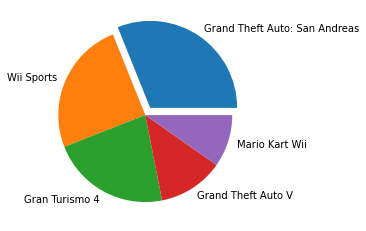

In [106]:
top_games_other = games.sort_values("Other_Sales", ascending=False).head(5)
explosion = [0.1,0,0,0,0]
plt.pie(top_games_other["Other_Sales"], labels = top_games_other["Name"], explode=explode)
plt.show()

And in the last we re gonna see at all in all global sales:

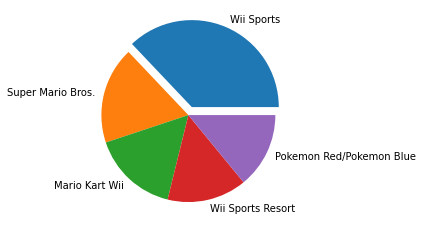

In [116]:
games_global = games.sort_values("Global_Sales", ascending=False).head(5)
explode = [0.1, 0 , 0, 0, 0]
plt.pie(games_global["Global_Sales"], labels=games_global["Name"], explode=explode)
plt.show()

Wii Sports is the most sold game in North America and European Union.
Pokemon Red/Pokemon Blue is the most sold same in Japan.
GTA San Andreas is the most sold game in other regions.
Wii Sports is the most sold game globally.